In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 15 02:09:15 2020
@author: jasonmoggridge

BA9E - Longest shared substring problem: using coloured suffix tree

In “Find the Longest Repeat in a String”, we encountered the Longest Repeat
 Problem, which could be solved using a suffix tree.

The second additional exercise that we will consider is below.

Longest Shared Substring Problem
Find the longest substring shared by two strings.

Given: Strings Text1 and Text2.

Return: The longest substring that occurs in both Text1 and Text2.
 (Multiple solutions may exist, in which case you may return any one.)

Sample Dataset
TCGGTAGATTGCGCCCACTC
AGGGGCTCGCAGTGTAAGAA
Sample Output
AGA

"""



def coloured_suffix_trie(Text1, Text2):
    """ Constructs a Suffix Trie from Text for later collapsing and making Suffix Tree """
    
    Text = Text1 + Text2
    split = len(Text1)
    
    Trie = {0:{}}
    for i in range(len(Text)-1):  # $ is handled afterwards
        v = 0
        for j in range(i, len(Text)-1):
            for dest in Trie[v].keys():
                if Text[j] in Trie[v][dest]:
                    v = dest
                    break
            else:
                w = len(Trie.keys())
                Trie[w] = {}
                Trie[v][w] = (Text[j], j, 'grey') # add v:w(symbol, @ position -> 0-indexed)
                v = w

        # set leaf node(w)'s label = -(start position (i) +1)
        w = -(i+1)

        colour = 'red'
        if i >= split:
            colour = 'blue'
        Trie[w]= {colour}
        # add final edge to leaf
        Trie[v][w] = ('$', j+1, colour) # end of suffix ($, end position -> 0-indexed)

    return Trie
    #

def get_NB_paths(Trie):
    """Identifies + Remove all non-branching node v from adj dict for Trie -> Tree"""
    """ non-branching paths for collapsing to create Tree from Trie"""

    Paths = []

    # identify branchpoints from all nodes
    for v in Trie.keys():
        if Trie[v]:
            if len(Trie[v]) > 1:

                # start a path for each branchpoint
                for dest in Trie[v].keys():
                    path = [v]

                    # when visiting NB v, add dest to path;
                    # if new dest is a leaf, save path & break
                    while len(Trie[dest]) == 1:
                        source = dest
                        path.append(source)
                        dest = next(iter(Trie[source]))
                        if dest in ('red','blue'):
                            break
                    path.append(dest)
                    Paths.append(path)
    return Paths
#
 

def coloured_suffix_tree(Trie, nb_paths):
    
    """Tree{source: dest:(position, length)
        Colour[node] = red, blue, or grey
    """
    Tree = {}
    Colour = {0:'grey'}
    for path in nb_paths:
        
        
        position = Trie[path[0]][path[1]][1]
        if path[-1] in ('red','blue'):
            colour = path.pop()
        else:
            colour = 'grey'
        if path[0] not in Tree.keys():
            Tree[path[0]] = {path[-1]:(position, len(path)-1)}
            Colour[path[-1]] = colour
        else:
            Tree[path[0]][path[-1]] = (position, len(path)-1)
            Colour[path[-1]] = colour
            
    return Tree, Colour
#
    

def colour_tree(Tree, Colour):
            
    while 'grey' in Colour.values(): # while ripe nodes...
        
        for v in Tree.keys():
            if Colour[v] == 'grey':
                
                ripe = True
                for u in Tree[v].keys():
                    if Colour[u] == 'grey':
                        ripe = False
                
                if ripe:
                    Colour[v] = Colour[next(iter(Tree[v]))]
                    for u in Tree[v]:
                        if Colour[u] != Colour[v]:
                            Colour[v] = 'purple'
                            break

    return Tree, Colour
#

In [133]:
### Main ###
    
#Sample Input:

# Text1 = "CCAAGCTGCTAGAGG#"
# Text2 = "CATGCTGGGCTGGCT$"

Text1 = "panama#"
Text2 = "bananas$"


# print(len(Text1))
#with open("data/dataset_296_6.txt",'r') as infile:
#
#with open("data/rosalind_ba9e.txt",'r') as infile:
#
#    Text1 = infile.readline().strip() + "#"
#    Text2 = infile.readline().strip() + "$"
    

Text = Text1 + Text2
Trie = coloured_suffix_trie(Text1, Text2)
# Print output:
print("\n\nf\nFinished trie-------------\n\n")
for v in Trie.keys():
    print(v,' to ', Trie[v])


del(Text1, Text2)

nb_paths = get_NB_paths(Trie)
print('\n ----- NonBranchingPaths:---------\n',\
     '\n'.join(str(path) for path in nb_paths))

Tree, Colour = coloured_suffix_tree(Trie, nb_paths)
del(Trie, nb_paths)

print("\n\n")
print("--------Suffix tree-------------\n\n")
for v in Tree.keys():
    print(v,' to ', Tree[v], Colour[v])
Tree, Colour = colour_tree(Tree, Colour)

print("\n\n")
print("--------Coloured tree-------------\n\n")
for v in Tree.keys():
    print(v,' to ', Tree[v], Colour[v])
#



f
Finished trie-------------


0  to  {1: ('p', 0, 'grey'), 16: ('a', 1, 'grey'), 30: ('n', 2, 'grey'), 54: ('m', 4, 'grey'), 74: ('#', 6, 'grey'), 83: ('b', 7, 'grey'), 105: ('s', 13, 'grey')}
1  to  {2: ('a', 1, 'grey')}
2  to  {3: ('n', 2, 'grey')}
3  to  {4: ('a', 3, 'grey')}
4  to  {5: ('m', 4, 'grey')}
5  to  {6: ('a', 5, 'grey')}
6  to  {7: ('#', 6, 'grey')}
7  to  {8: ('b', 7, 'grey')}
8  to  {9: ('a', 8, 'grey')}
9  to  {10: ('n', 9, 'grey')}
10  to  {11: ('a', 10, 'grey')}
11  to  {12: ('n', 11, 'grey')}
12  to  {13: ('a', 12, 'grey')}
13  to  {14: ('s', 13, 'grey')}
14  to  {-1: ('$', 14, 'red')}
-1  to  {'red'}
16  to  {17: ('n', 2, 'grey'), 43: ('m', 4, 'grey'), 65: ('#', 6, 'grey'), 103: ('s', 13, 'grey')}
17  to  {18: ('a', 3, 'grey')}
18  to  {19: ('m', 4, 'grey'), 91: ('n', 11, 'grey'), 99: ('s', 13, 'grey')}
19  to  {20: ('a', 5, 'grey')}
20  to  {21: ('#', 6, 'grey')}
21  to  {22: ('b', 7, 'grey')}
22  to  {23: ('a', 8, 'grey')}
23  to  {24: ('n', 9, 'grey')}
24  t

In [134]:

print(len(Tree.keys()))
print(len(Colour.keys()))
print(list(Colour.values()).count('red'))
print(list(Colour.values()).count('blue'))
print(list(Colour.values()).count('purple'))
# for key in Colour.keys():
#     print(key, Colour[key])


4
18
7
7
4


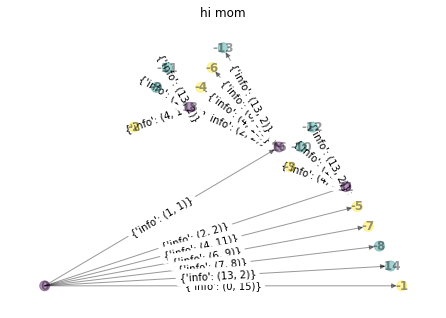

In [189]:
C = {'red':0, 'blue':1, 'purple':2}
CMAP=[]
for key in list(Colour.keys()):
    CMAP.append(C[Colour[key]])


import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
weighted_edges = []
for v in Tree.keys():
    for u in Tree[v].keys():
        G.add_edge(v,u, info = (Tree[v][u]))

# # smaller nodes and fonts
# plt.figure(2)
# nx.draw(G,pos,node_size=60,font_size=8) 
# # larger figure size
# plt.figure(3,figsize=(12,12)) 

nx.draw_planar(G, node_color= CMAP, with_labels= True, font_weight='bold',\
               node_size = 100, alpha=0.4, cmap=plt.cm.viridis_r)
nx.draw_networkx_edge_labels(G, pos=nx.planar_layout(G))
plt.title('hi mom')

plt.show()

In [170]:
plt.cm.cmaps_listed


{'magma': <matplotlib.colors.ListedColormap at 0xa19f836d0>,
 'magma_r': <matplotlib.colors.ListedColormap at 0xa19f83790>,
 'inferno': <matplotlib.colors.ListedColormap at 0xa19f837d0>,
 'inferno_r': <matplotlib.colors.ListedColormap at 0xa19f83850>,
 'plasma': <matplotlib.colors.ListedColormap at 0xa19f83890>,
 'plasma_r': <matplotlib.colors.ListedColormap at 0xa19f83910>,
 'viridis': <matplotlib.colors.ListedColormap at 0xa19f83950>,
 'viridis_r': <matplotlib.colors.ListedColormap at 0xa19f839d0>,
 'cividis': <matplotlib.colors.ListedColormap at 0xa19f83a10>,
 'cividis_r': <matplotlib.colors.ListedColormap at 0xa19f83a90>,
 'twilight': <matplotlib.colors.ListedColormap at 0xa19f83ad0>,
 'twilight_r': <matplotlib.colors.ListedColormap at 0xa19f83b50>,
 'twilight_shifted': <matplotlib.colors.ListedColormap at 0xa19f83b90>,
 'twilight_shifted_r': <matplotlib.colors.ListedColormap at 0xa19f83bd0>}